In [5]:
import os
import subprocess
import matplotlib.pyplot as plt

rec_street_dir = '/home/dabean/spatialaudiogen/spatialaudiogen/data/orig/rec-street/merged'
yt_clean_dir = '/home/dabean/spatialaudiogen/spatialaudiogen/data/orig/yt-clean/merged'

def get_video_length(video_path):
    cmd = [
          'ffprobe',
          '-v', 'error',
          '-show_entries', 'format=duration',
          '-of', 'default=noprint_wrappers=1:nokey=1',
          video_path
      ]
    result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    return float(result.stdout.strip())

def get_videos_length_list(directory):
    lengths = []
    for video_file in os.listdir(directory):
        if video_file.endswith('.mp4'):
            video_path = os.path.join(directory, video_file)
            video_length = get_video_length(video_path)
            lengths.append(video_length)
    return lengths

rec_street_lens = get_videos_length_list(rec_street_dir)
yt_clean_lens = get_videos_length_list(yt_clean_dir)


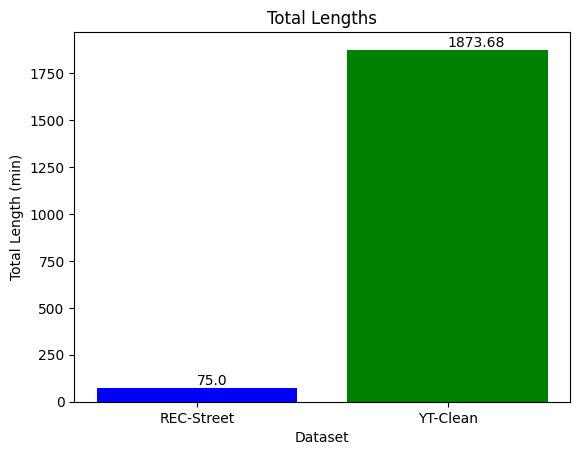

In [37]:
rec_street_total = sum(rec_street_lens) / 60
yt_clean_total = sum(yt_clean_lens) / 60

fig, ax = plt.subplots()
bar_labels = ['REC-Street', 'YT-Clean']
total_lens = [rec_street_total, yt_clean_total]
colors = ['blue', 'green']
bars = plt.bar(bar_labels, total_lens, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Total Lengths')
plt.xlabel('Dataset')
plt.ylabel('Total Length (min)')
plt.show()

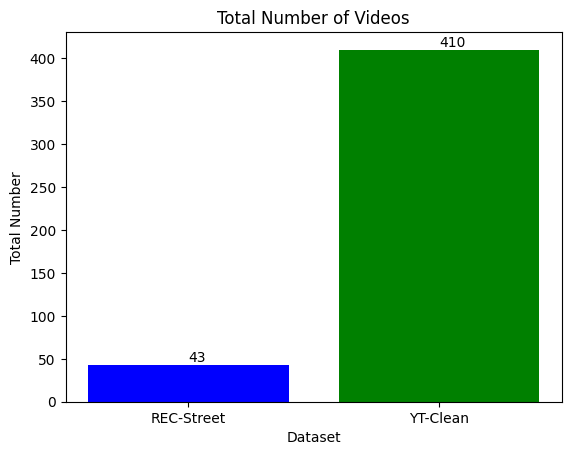

In [36]:
rec_street_num = len(rec_street_lens)
yt_clean_num = len(yt_clean_lens)

fig, ax = plt.subplots()
bar_labels = ['REC-Street', 'YT-Clean']
total_nums = [rec_street_num, yt_clean_num]
colors = ['blue', 'green']
bars = plt.bar(bar_labels, total_nums, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Total Number of Videos')
plt.xlabel('Dataset')
plt.ylabel('Total Number')
plt.show()

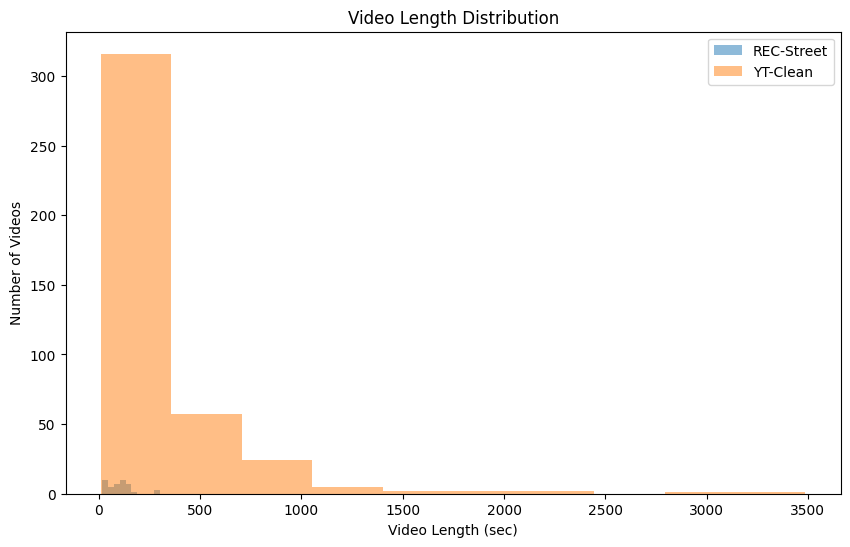

In [26]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(rec_street_lens, alpha=0.5, label='REC-Street')
plt.hist(yt_clean_lens, alpha=0.5, label='YT-Clean')

# plt.xscale('log')
# plt.yscale('log')

plt.xlabel('Video Length (sec)')
plt.ylabel('Number of Videos')
plt.title('Video Length Distribution')
plt.legend()
plt.show()

Text(0, 0.5, 'Video Length (sec)')

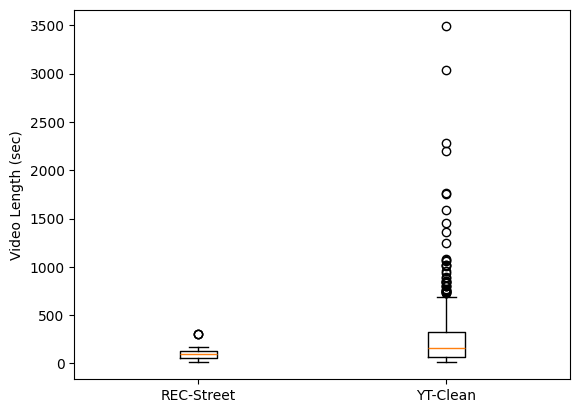

In [28]:
plt.boxplot([rec_street_lens, yt_clean_lens])
plt.xticks([1, 2],['REC-Street', 'YT-Clean'])
plt.ylabel('Video Length (sec)')

Text(0, 0.5, 'Video Length (sec)')

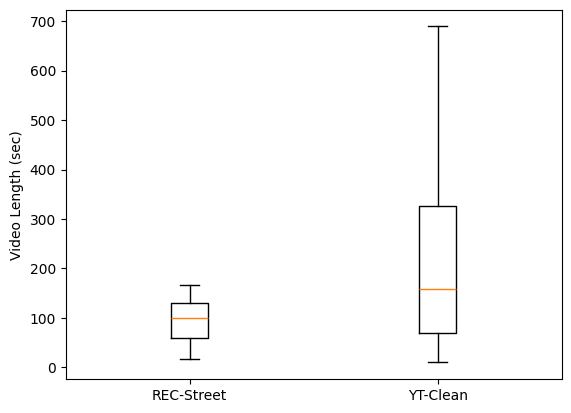

In [29]:
plt.boxplot([rec_street_lens, yt_clean_lens], showfliers=False)
plt.xticks([1, 2],['REC-Street', 'YT-Clean'])
plt.ylabel('Video Length (sec)')

In [31]:
rec_street_med = np.median(rec_street_lens)
yt_clean_med = np.median(yt_clean_lens)
print('REC-Street median: ', rec_street_med)
print('YT-Clean median: ', yt_clean_med)

REC-Street median:  100.541995
YT-Clean median:  158.59200700000002


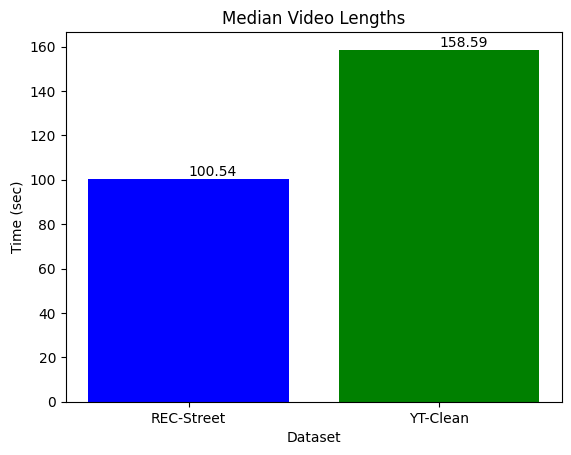

In [35]:
fig, ax = plt.subplots()
bar_labels = ['REC-Street', 'YT-Clean']
meds = [rec_street_med, yt_clean_med]
colors = ['blue', 'green']
bars = plt.bar(bar_labels, meds, color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Median Video Lengths')
plt.xlabel('Dataset')
plt.ylabel('Time (sec)')
plt.show()

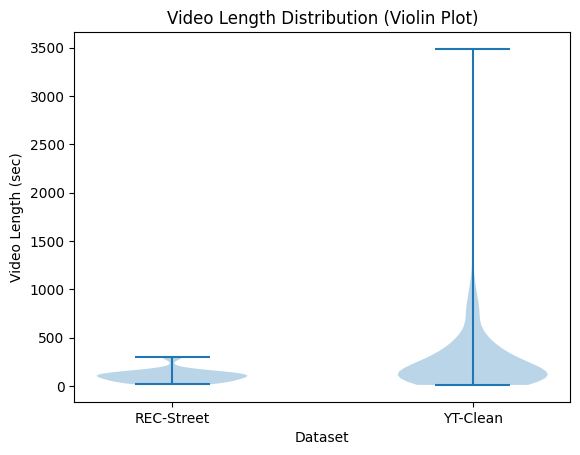

In [49]:
fig, ax = plt.subplots()
violin = ax.violinplot([rec_street_lens, yt_clean_lens])
ax.set_xlabel('Dataset')
ax.set_ylabel('Video Length (sec)')
ax.set_xticks([1, 2])
ax.set_xticklabels(['REC-Street', 'YT-Clean'])
ax.set_title('Video Length Distribution (Violin Plot)')
plt.show()
